<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/CIFAR-10%20ObjectRecognitionDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [42]:
# dataset api, no need to download the whole dataset
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [44]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [45]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [46]:
# importing the module to unzip .7z files
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()

In [48]:
archive.close()
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [49]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [50]:
filenames = os.listdir('/content/train')

In [51]:
type(filenames)

list

In [52]:
len(filenames)

50000

In [53]:
filenames[1:10]

['18056.png',
 '31916.png',
 '21240.png',
 '7451.png',
 '34027.png',
 '33998.png',
 '16016.png',
 '15519.png',
 '41069.png']

Labels Processing

In [54]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [55]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [56]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [57]:
# label encoding the the different object names into numerical values
labels = list(labels_df['label'])

labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

for i in range(len(labels)):
  labels[i]=labels_dictionary[labels[i]]

In [58]:
print(type(labels))
print(labels)

<class 'list'>
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 

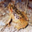

In [59]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png') # this will store the numpy array value
cv2_imshow(img)

   id label
0   1  frog


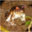

In [60]:
print(labels_df[labels_df['id']==1])
img = cv2.imread('/content/train/1.png')
cv2_imshow(img)

In [61]:
id_list = list(labels_df['id'])
print(type(id_list))
print(id_list[0:5])

<class 'list'>
[1, 2, 3, 4, 5]


Image Processing

In [62]:
# convert images to numpy arrays
train_data_folder_path = '/content/train/'

data = [] # list to append

for id in id_list:
  image = Image.open(train_data_folder_path + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [63]:
print(type(data))
print(len(data))
print(type(data[0]))
print(data[0])

<class 'list'>
50000
<class 'numpy.ndarray'>
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [64]:
# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

In [65]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)

In [67]:
print(x.shape, x_train.shape, x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [68]:
# to check if the dataset was eually splitted in training and testing data with respect to different objects
# every label(0-9) must have exactly 4000 occurences
from collections import OrderedDict

res =  [(el, list(y_train).count(el)) for el in list(y_train)]
print(list(OrderedDict(res).items()))

[(2, 4000), (8, 4000), (9, 4000), (5, 4000), (6, 4000), (3, 4000), (1, 4000), (0, 4000), (7, 4000), (4, 4000)]


Scaling the data

Scaling the value 0-255 to 0-1

In [69]:
x_train_scaled = x_train/255;
x_test_scaled = x_test/255

Building the neural network

In [70]:
import tensorflow as tf
from tensorflow import keras # it's a wrapper of a library that helps to use tensorflow and pytorch easily

In [71]:
num_of_classes = 10 # num of classes in the dataset

# setting up the layers of Neural Network
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)), # shape of the image matrix, tell the model the size of the image and whether its B/W or colour
    keras.layers.Dense(64, activation='relu'), # we generally use the no. of neurons in the power of 2
    keras.layers.Dense(num_of_classes, activation='softmax') # if binary classification -> sigmoid, if multi classification -> softmax
])

In [72]:
# compile the neural network
model.compile(optimizer='adam', # common optimizer used to optimize the weights 
              loss='sparse_categorical_crossentropy', # for multi class
              metrics=['acc'] # as it's a classification problem
              )

In [73]:
# training the neural network
model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=20) # validation_split is used to test the weights in each iteration

Epoch 1/20
1125/1125 [==============================] - 6s 4ms/step - loss: 1.9488 - acc: 0.2954 - val_loss: 1.8537 - val_acc: 0.3240
Epoch 2/20
1125/1125 [==============================] - 4s 3ms/step - loss: 1.8107 - acc: 0.3484 - val_loss: 1.7841 - val_acc: 0.3510
Epoch 3/20
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7622 - acc: 0.3659 - val_loss: 1.7519 - val_acc: 0.3772
Epoch 4/20
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7207 - acc: 0.3828 - val_loss: 1.7835 - val_acc: 0.3720
Epoch 5/20
1125/1125 [==============================] - 4s 3ms/step - loss: 1.6922 - acc: 0.3896 - val_loss: 1.7371 - val_acc: 0.3685
Epoch 6/20
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6679 - acc: 0.4019 - val_loss: 1.6739 - val_acc: 0.3995
Epoch 7/20
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6513 - acc: 0.4075 - val_loss: 1.6748 - val_acc: 0.4080
Epoch 8/20
1125/1125 [==============================] - 4s 4ms

As you can see above, the accuracy is pathetically at 0.44 which is 44%, therefore we take a pre-trained model and train it with our dataset

# ResNet 50

In [74]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [75]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
# imagenet is the dataset on which ResNet50 is pre-trained, we retain the weights and train our dataset on it
# include_top=False does not include the output layer as our output layer is different

convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [76]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.UpSampling2D((2, 2)))
# the above 3 LOC upscales the images from 32*32 to 256*256, each LOC multiplies the photo resolution by 2, 32*2= 64 *2= 128 *2= 256
# we do this as the resolution of our images our 32*32, whereas the ResNet50 was trained on 256*256
model.add(convolutional_base)
model.add(layers.Flatten()) # converts the matrix in 1-D
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # turns off a few neurons to prevent over-fitting 
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [77]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [78]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
1125/1125 [==============================] - 474s 394ms/step - loss: 1.6290 - acc: 0.4588 - val_loss: 0.8677 - val_acc: 0.7692
Epoch 2/15
1125/1125 [==============================] - 436s 387ms/step - loss: 0.9849 - acc: 0.7114 - val_loss: 0.4620 - val_acc: 0.8907
Epoch 3/15
1125/1125 [==============================] - 435s 387ms/step - loss: 0.7292 - acc: 0.8113 - val_loss: 0.3457 - val_acc: 0.9220
Epoch 4/15
1125/1125 [==============================] - 442s 393ms/step - loss: 0.5701 - acc: 0.8652 - val_loss: 0.2901 - val_acc: 0.9295
Epoch 5/15
1125/1125 [==============================] - 442s 393ms/step - loss: 0.4467 - acc: 0.9053 - val_loss: 0.2561 - val_acc: 0.9388
Epoch 6/15
1125/1125 [==============================] - 442s 393ms/step - loss: 0.3585 - acc: 0.9301 - val_loss: 0.2262 - val_acc: 0.9388
Epoch 7/15
1125/1125 [==============================] - 442s 393ms/step - loss: 0.2871 - acc: 0.9497 - val_loss: 0.2172 - val_acc: 0.9410
Epoch 8/15
1125/1125 [============

In [79]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print("test accuracy = ", accuracy)

313/313 [==============================] - 38s 116ms/step - loss: 0.2288 - acc: 0.9439
test accuracy =  0.9438999891281128


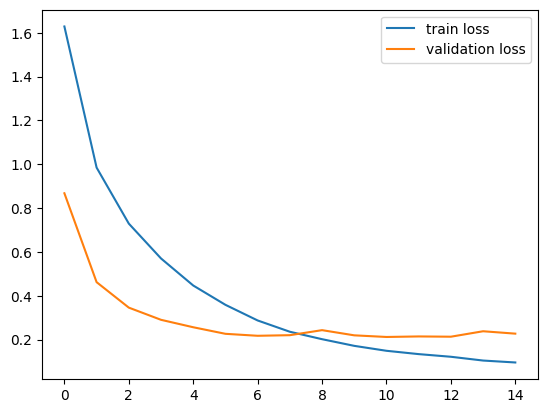

In [81]:
h = history

# plot the loss function value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

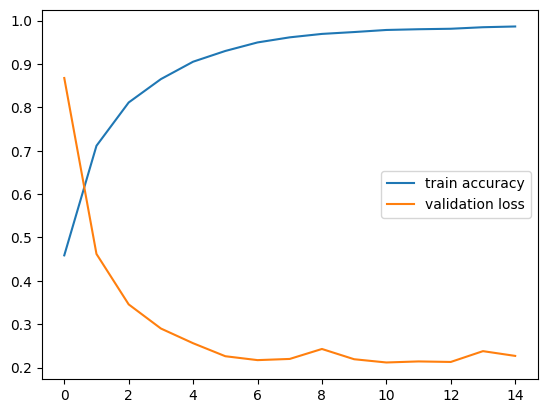

In [83]:
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()